In [1]:
#!pip install wordcloud

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
from nltk.corpus import stopwords  

In [3]:
book=pd.read_csv("Elon_musk.csv",error_bad_lines=False,index_col=0)  
book 

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
book.isnull().sum()

Text    0
dtype: int64

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

In [6]:
import nltk
from nltk.stem.porter import *
from nltk.stem.porter import PorterStemmer 

In [7]:
ps=PorterStemmer()

In [8]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
book.Text.values

array(['@kunalb11 I’m an alien',
       '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
       '@joerogan @Spotify Great interview!', ...,
       '@TeslaGong @PPathole Samwise Gamgee',
       '@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>',
       'Progress update August 28'], dtype=object)

In [10]:
# Defining a function to preprocess the data
def preprocess(x):
         x=re.sub('[^a-zA-Z ]', '', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x
    

In [11]:
book["Text"]=book["Text"].apply(preprocess)

In [12]:
sp_named =  "".join(book['Text'].astype('str').tolist()) # to convert the text into str type

In [13]:
import spacy  # language models
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
doc=nlp(sp_named)
displacy.render(doc,style='ent',jupyter=True)

In [14]:
book['scores']=book['Text'].apply(lambda review:sid.polarity_scores(review)) # creating new column scores to get all the scores including compound score
book.head()

,Text,scores
1,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,idaacarmack ray trace cyberpunk hdr nextlevel tri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,joerogan spotifi great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
4,gtera doge underestim,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,teslacn congratul tesla china amaz execut last...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [15]:
book['compound']=book['scores'].apply (lambda scores:scores['compound'])
book.head() # creating separate column with compound scores

,Text,scores,compound
1,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,idaacarmack ray trace cyberpunk hdr nextlevel tri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,joerogan spotifi great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
4,gtera doge underestim,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,teslacn congratul tesla china amaz execut last...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [16]:
book['comp_score']=book['compound'].apply(lambda c: 1 if c>=0 else 0 )# creating comp_score column to compare it with reaction
book.head()

,Text,scores,compound,comp_score
1,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,idaacarmack ray trace cyberpunk hdr nextlevel tri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,joerogan spotifi great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,1
4,gtera doge underestim,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
5,teslacn congratul tesla china amaz execut last...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


In [17]:
book.Text.values

array(['kunalb im alien',
       'idaacarmack ray trace cyberpunk hdr nextlevel tri',
       'joerogan spotifi great interview', ...,
       'teslagong ppathol samwis gamge', 'ppathol altho dumb dumber ufuf',
       'progress updat august'], dtype=object)

In [18]:
book['comp_score'].value_counts()

1    1828
0     171
Name: comp_score, dtype: int64

In [19]:
# Defining a function to get the sentiment 
def get_vader_sentiment(review):
    
    '''
    Utility function to classify sentiment of passed tweet 
    using text blob's sentiments method
    
    '''
    sia=SentimentIntensityAnalyzer()
    analysis=sia.polarity_scores(review)# Create Text blob object of passed tweet text
    # set sentiment
    if analysis["compound"]>0:
        return "positive"
    elif analysis["compound"]<0:
        return "negative"
    else:
        return "neutral"

In [20]:
get_vader_sentiment(sp_named)

'positive'

<AxesSubplot:xlabel='compound', ylabel='Density'>

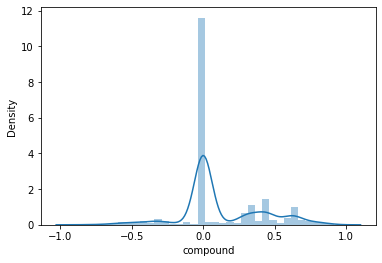

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(book['compound']) 

<AxesSubplot:xlabel='Text', ylabel='compound'>

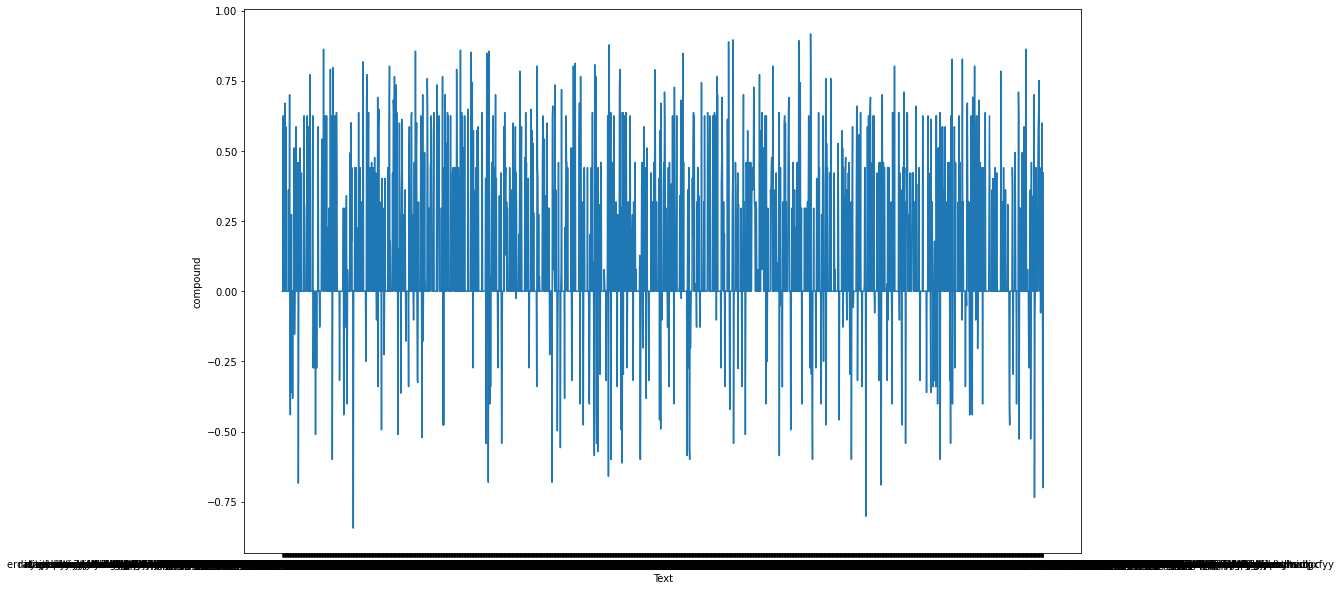

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='compound',x='Text',data=book)

(array([  41.,  103., 1250.,  387.,  218.]),
 array([-0.8442 , -0.49198, -0.13976,  0.21246,  0.56468,  0.9169 ]),
 <BarContainer object of 5 artists>)

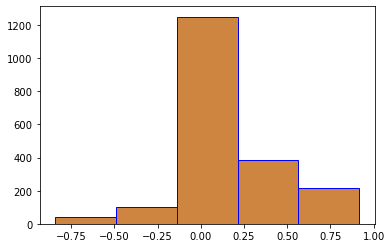

In [55]:
plt.hist(book['compound'],facecolor ="peru",edgecolor ="blue",bins =5)
#creates histogram with 5bins and colours filled init

In [21]:
from sklearn.feature_extraction.text import CountVectorizer 
  
cv = CountVectorizer()
a = cv.fit_transform(book.Text).toarray() 
a=pd.DataFrame(a,columns=cv.get_feature_names())

In [22]:
a

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
book.head()

,Text,scores,compound,comp_score
1,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,idaacarmack ray trace cyberpunk hdr nextlevel tri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,joerogan spotifi great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,1
4,gtera doge underestim,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
5,teslacn congratul tesla china amaz execut last...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


In [25]:
# Creating the Bag of Words model 

# To extract max 1999 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer()#(max_features = 1999)  
  
# X contains corpus (dependent variable) 

X = cv.fit_transform(book.Text.values).toarray()  
X=pd.DataFrame(X,columns=cv.get_feature_names())

In [26]:
X.shape

(1999, 4508)

In [27]:
from sklearn.model_selection import train_test_split 
  
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, book.comp_score, test_size = 0.3,) 

In [28]:
X_train

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
1143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_test.shape

(600, 4508)

In [30]:
y_test.shape

(600,)

## Decision Tree and other models

In [31]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import statsmodels.api as sm

In [32]:
models=[DecisionTreeClassifier(),LogisticRegression(),LinearSVC(),MultinomialNB()]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))

DecisionTreeClassifier() accuracy :: 0.925
LogisticRegression() accuracy :: 0.925
LinearSVC() accuracy :: 0.9366666666666666
MultinomialNB() accuracy :: 0.8883333333333333


# Using TFIDF


In [33]:
# Created for understanding purpose (don't run)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X = vectorizer.fit_transform(book.Text.values).toarray()  
X=pd.DataFrame(X,columns=vectorizer.get_feature_names())


In [34]:
from sklearn.model_selection import train_test_split 
  
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, book.comp_score, test_size = 0.3,) 

In [35]:
X.shape

(1999, 4508)

In [36]:
X_train

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
110,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.0,0.0,0.0,0.0,0.0,0.0,0.30595,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
1338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


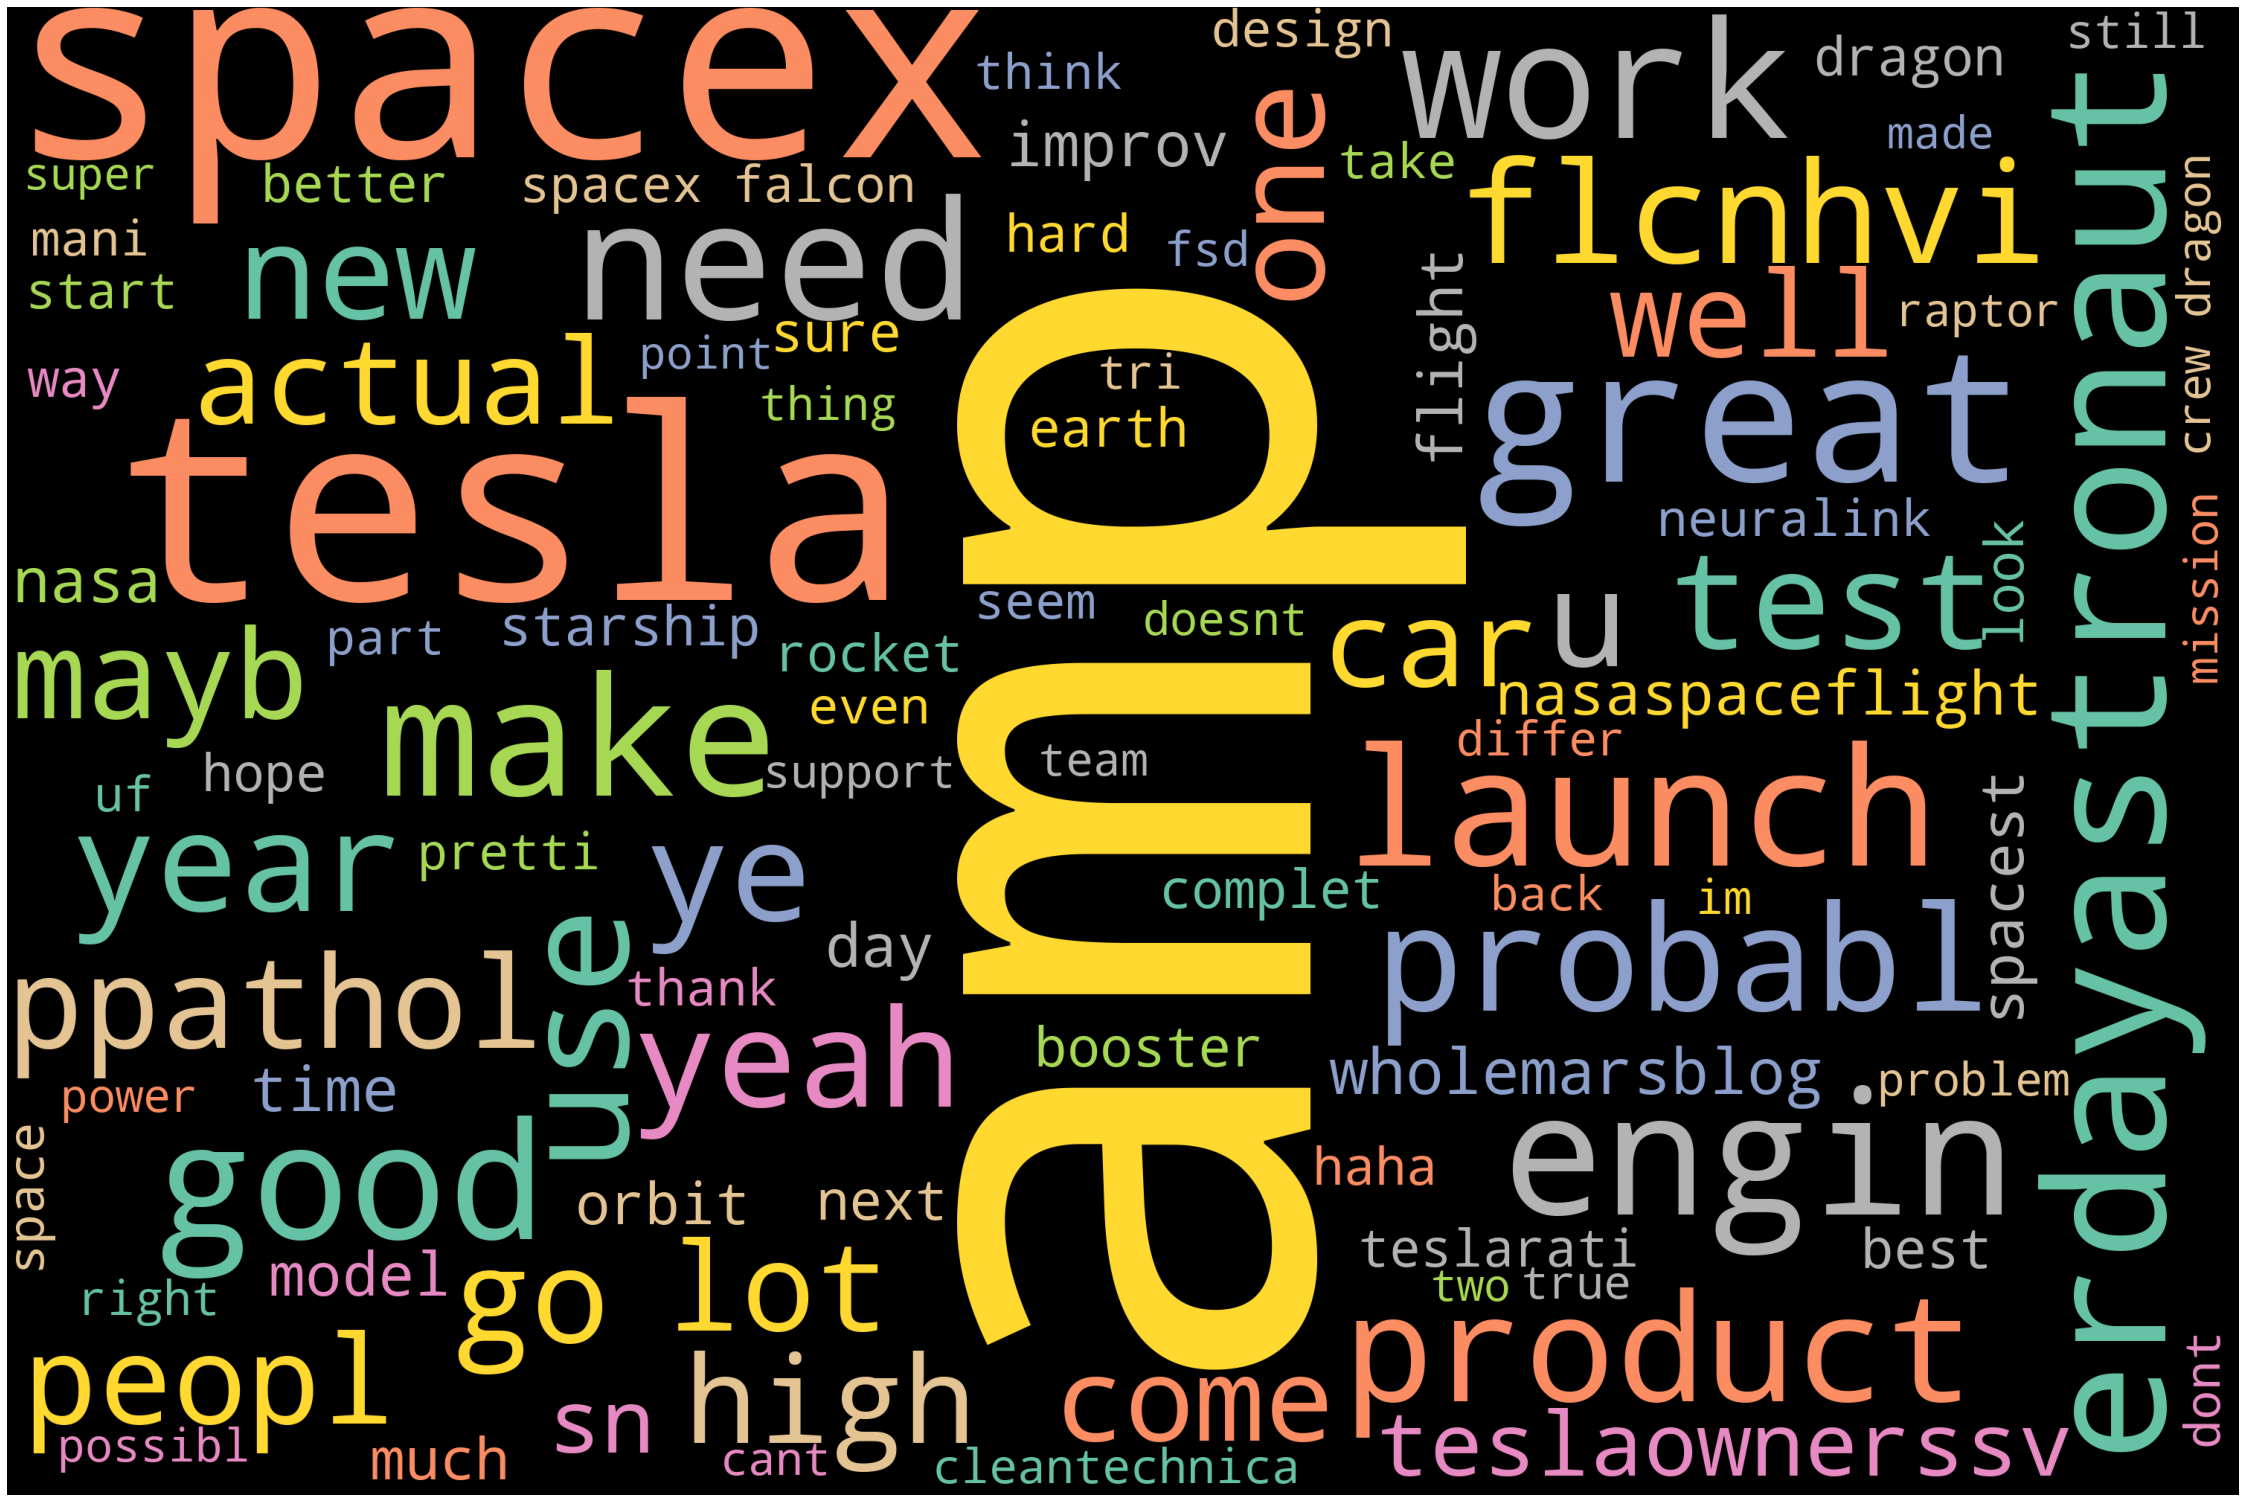

In [38]:
plt.figure(figsize=(40, 30))
wordcloud_ip=WordCloud(width = 3000, height = 2000,background_color='black', max_words=100,colormap='Set2').generate(sp_named)
plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

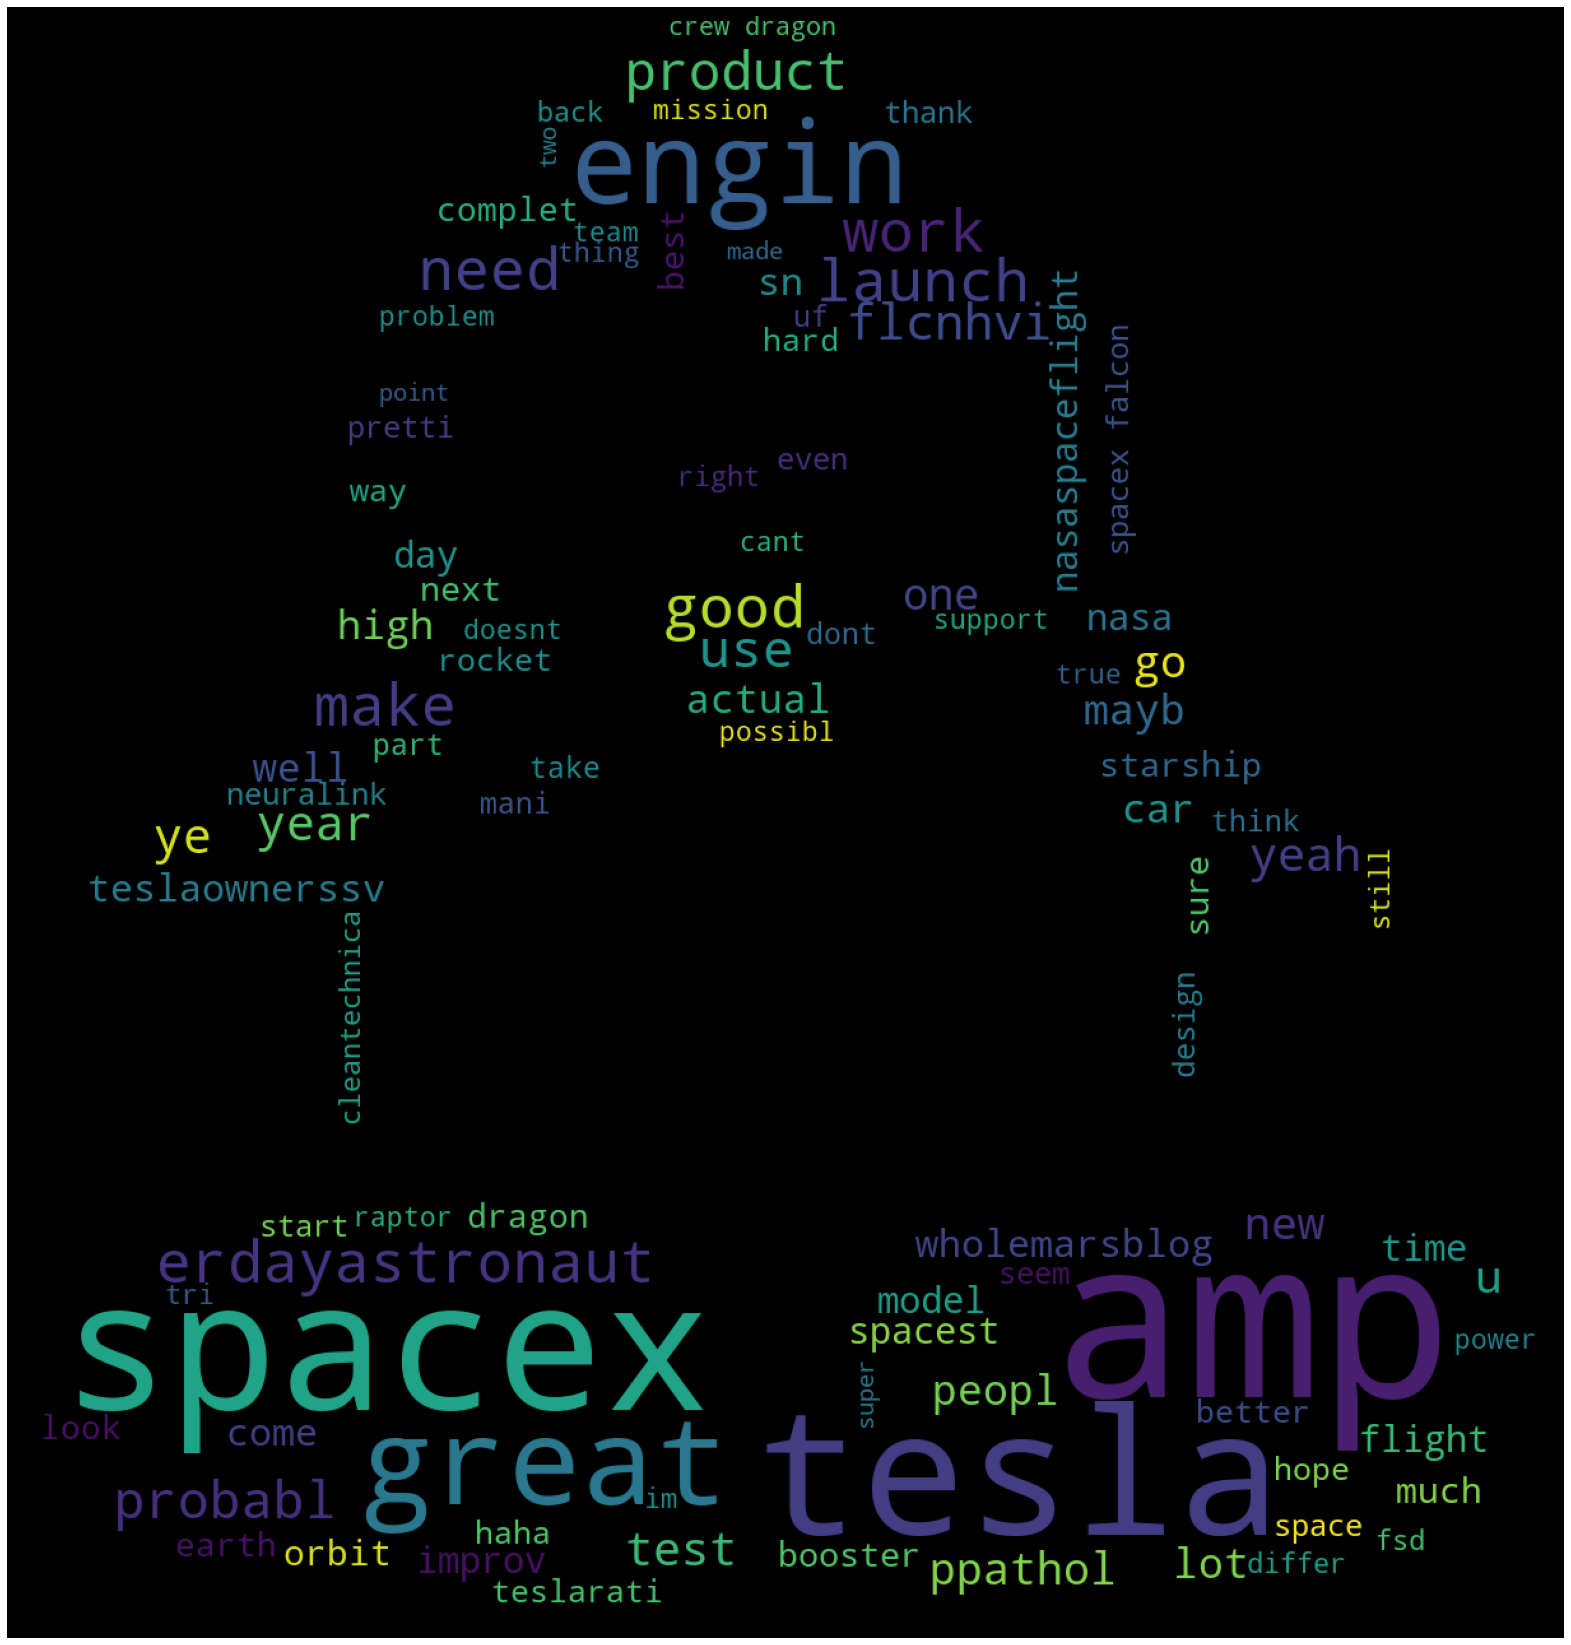

In [51]:
from PIL import Image
plt.figure(figsize=(40, 30))
maskarray=np.array(Image.open('animal-g7bb8413e7_1280.png'))
cloud=WordCloud(background_color='black', max_words=100,mask=maskarray).generate(sp_named)
plt.imshow(cloud)
plt.axis("off")
plt.show()

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import statsmodels.api as sm

In [40]:
models=[DecisionTreeClassifier(),LogisticRegression(),LinearSVC(),MultinomialNB()]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_test_pred))

DecisionTreeClassifier() accuracy :: 0.9233333333333333
LogisticRegression() accuracy :: 0.905
LinearSVC() accuracy :: 0.91
MultinomialNB() accuracy :: 0.905


## From the above analysis we can see that the sentiments of the overall texts is positive